In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

# Select a style, it will affect all subsequent plots.
plt.style.use('fivethirtyeight')

# Add this after your imports to configure Jupyter to 
# display your plots.
%matplotlib inline

# Matplotlib Histograms

In this section, we are going to learn how to create histograms, which are a great way of summarizing data sets.

The basic idea of a histogram is to create "buckets" into which your data points fall into and display those rather than individually displaying all the data points.

In [2]:
nd_football_roster = pd.read_csv('./data/nd-football-2017-roster.csv')
seattle_weather_2015_2016 = pd.read_csv(
    './data/seattle_weather_2015_2016.csv')

## One Dimensional Histograms
Simple, one dimensional histograms are created with the **`axes.hist()`** method.

### A Basic Histogram
This create a basic histogram: you simply have to pass a NumPy array or Pandas series object to it. 

By default, it will create a set of buckets from the values in your array/series along the x-axis and then display how many elements fall in each bucket via the y-axis.

(array([  5.,   5.,   8.,  10.,  13.,  24.,  14.,   5.,   5.,   1.]),
 array([ 68. ,  69.2,  70.4,  71.6,  72.8,  74. ,  75.2,  76.4,  77.6,
         78.8,  80. ]),
 <a list of 10 Patch objects>)

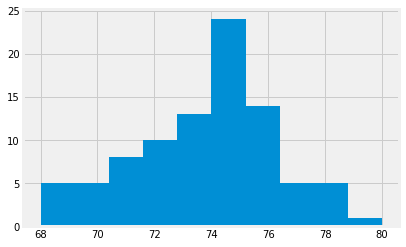

In [3]:
# Create a histogram of ND Football Player Heights
# You can quickly see the most common height bucket
# on the team.
figure, axes = plt.subplots()
axes.hist(nd_football_roster['Height'])

As always, you can adjust the title, label, and legend properties of the **`axes`** object.

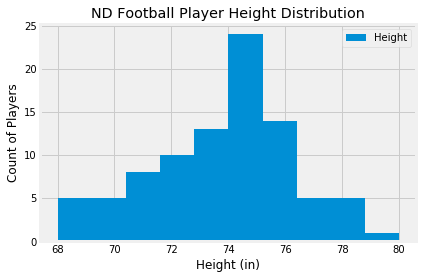

In [4]:
# Adding title, labels, and legend
figure, axes = plt.subplots()
axes.hist(nd_football_roster['Height'])
axes.legend()
axes.set_title('ND Football Player Height Distribution')
axes.set_xlabel('Height (in)')
axes.set_ylabel('Count of Players')

### Customizing Histograms

#### Changing the Number of Bins
Matplotlib tries to guess the number of bins you want for your histograms and it generally does a good job at this. Nonetheless, you may want to increase/decrease the default to adjust the granularity of your plot.

You can do so with the `bins` parameter.

(array([  1.,   4.,   5.,   8.,   0.,  10.,  13.,  14.,  10.,   0.,  14.,
          5.,   5.,   0.,   1.]),
 array([ 68. ,  68.8,  69.6,  70.4,  71.2,  72. ,  72.8,  73.6,  74.4,
         75.2,  76. ,  76.8,  77.6,  78.4,  79.2,  80. ]),
 <a list of 15 Patch objects>)

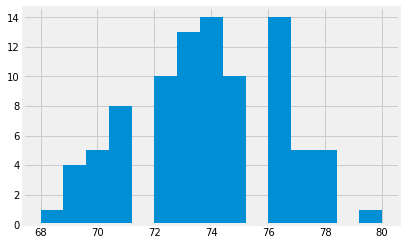

In [5]:
figure, axes = plt.subplots()

# Adjust the number of bins to 15
# The increased granularity will
# expose some heights that aren't represented
# on the team.
axes.hist(nd_football_roster['Height'], bins=15)

#### Changing a Range for Bins
We know that we can use the `axes.set_xlim` and `axes.set_ylim` methods to focus/zoom into one area of a plot.

The **`range`** parameter is somewhat similar functionally to this in that it allows you to specify the range of input values to plot.

The key difference is that when you use the **`range`** parameter, Matplotlib does all the binning/grouping within the range specified.

With `set_xlim`/`set_ylim` you would simply zoom into a smaller area of the plot. This parameter allows you to calculate the histogram with a subset of your data.

Let's demonstrate using our Seattle Weather dataset.

(array([ 674.,   35.,   17.,    4.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([ 0.   ,  0.645,  1.29 ,  1.935,  2.58 ,  3.225,  3.87 ,  4.515,
         5.16 ,  5.805,  6.45 ]),
 <a list of 10 Patch objects>)

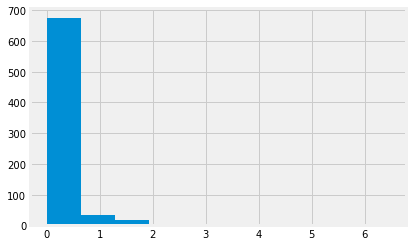

In [6]:
# Simply plot the precipitation records
# with default parameters.
figure, axes = plt.subplots()
axes.hist(seattle_weather_2015_2016['precipitation'])

Because there are so many records with no rain, it skews the chart. If fact, the distortion is so high, that we can't visually make out any records above 2 inches (though we know they must be there because of the bins Matplotlib created).

Let's focus our histogram between .5 and 2.5 inches:

(0.5, 2.5)

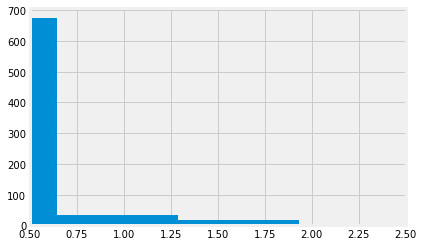

In [8]:
# Simply plot the precipitation records
# with default parameters.
figure, axes = plt.subplots()
axes.hist(seattle_weather_2015_2016['precipitation'])
axes.set_xlim(0.5,2.5)
#simply zoom-in

As you can see above, it did zoom in the range we wanted between 0.5 and 2.5, but the "binning" is still too coarse. **This is why using range parameter rather than set_xlim**

(array([ 10.,   9.,   7.,   5.,   6.,   3.,   2.,   6.,   2.,   3.,   3.,
          4.,   2.,   2.,   2.,   1.,   1.,   0.,   0.,   0.]),
 array([ 0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5,
         1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5]),
 <a list of 20 Patch objects>)

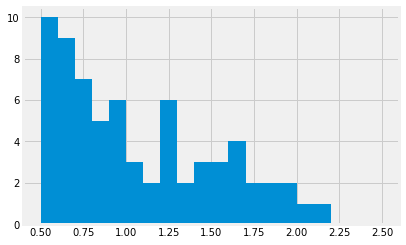

In [9]:
# This will give us a plot of how many
# reasonably, but not extremely, raining days
# Seattle experienced in 2015-2016
figure, axes = plt.subplots()
axes.hist(
    seattle_weather_2015_2016['precipitation'], 
    range=(.5, 2.5), 
    bins=20)

#### Overlaying Multiple Histograms
Just like we are able to plot multiple lines on a single axes, we can plot multiple histograms. 

(array([  1.,   2.,   5.,  12.,  24.,  24.,  42.,  37.,  39.,  32.,  46.,
         45.,  43.,  42.,  40.,  53.,  57.,  82.,  72.,  33.]),
 array([  7.2 ,  10.69,  14.18,  17.67,  21.16,  24.65,  28.14,  31.63,
         35.12,  38.61,  42.1 ,  45.59,  49.08,  52.57,  56.06,  59.55,
         63.04,  66.53,  70.02,  73.51,  77.  ]),
 <a list of 20 Patch objects>)

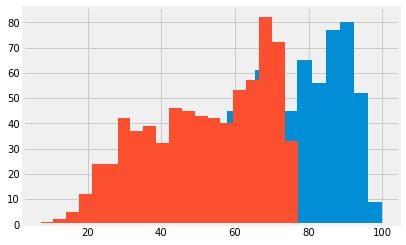

In [10]:
figure, axes = plt.subplots()
axes.hist(
    seattle_weather_2015_2016['high_temp'], 
    bins=20)
axes.hist(
    seattle_weather_2015_2016['low_temp'], 
    bins=20)

That is pretty cool, but there are a number of things that are not ideal with our plot:
1. The low temperatures are in green. 
2. The low temperatures are covering up the high temperatures.
3. There is no legend to clearly deliniate which is which.

Let's combine what we've learned so far about Matplotlib to address these issues.

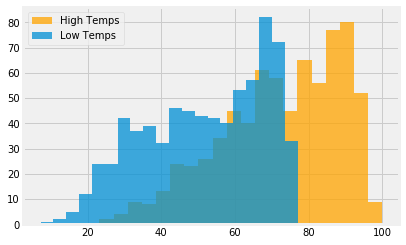

In [11]:
figure, axes = plt.subplots()
axes.hist(
    seattle_weather_2015_2016['high_temp'], 
    bins=20, 
    label='High Temps', # Use label to specify legend name
    color='orange', # Override the default color
    alpha=.75 # Adjust alpha to allow both datasets to appear
)
axes.hist(
    seattle_weather_2015_2016['low_temp'], 
    bins=20, 
    label='Low Temps', # Use label to specify legend name
    alpha=.75 # Adjust alpha to allow both datasets to appear
)

# Enable the legend
axes.legend()

## Two Dimensional Histograms

In the previous section, we demonstrated how to generate a histogram on a single variable in a data set. In this section, we are going to cover how you can create 2 dimensional histograms to visualize the relationship between two variables in a data set.

We will start by going back to our ND football roster and create a plot that shows the relationships between player heights and weights.

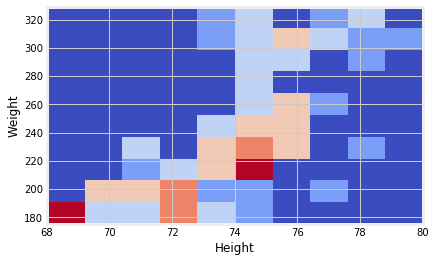

In [12]:
figure, axes = plt.subplots()
image = axes.hist2d(
    nd_football_roster['Height'],
    nd_football_roster['Weight'], 
    cmap='coolwarm', # Notice we use `cmap` to specify color range
)

axes.set_xlabel("Height")
axes.set_ylabel("Weight")

If you recall from our previous section, we have to pass an image to the *`figure.colorbar()`* method in order for it to work correctly.

Unlike the *`axes.scatter()`* method, the *`axes.hist2d`* method returns a 4 element tuple. The last element is the image reference that we need to pass into *`figure.colorbar()`*. **This is a idiosyncratic thing to keep track**

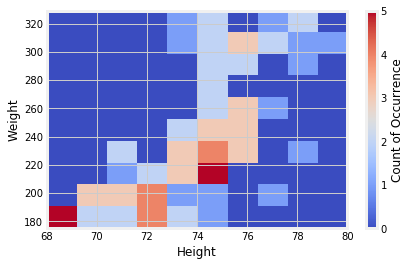

In [13]:
figure, axes = plt.subplots()

results = axes.hist2d(
    nd_football_roster['Height'],
    nd_football_roster['Weight'], 
    cmap='coolwarm')

# Pass in the 4th element (index 3)
figure.colorbar(results[3], label='Count of Occurrence')


axes.set_xlabel("Height")
axes.set_ylabel("Weight")

### Reduce clutter with the `cmin` & `cmax` arguments
In both of our examples, there is a lot of visual noise that comes from the bins that have 0 occurences. We can remove this clutter by specifying the `cmin` (count minimum) argument.

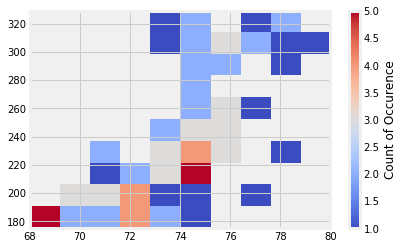

In [16]:
figure, axes = plt.subplots()
results = axes.hist2d(
    nd_football_roster['Height'],
    nd_football_roster['Weight'],
    cmap='coolwarm',
    cmin=1) #doesn't put any data for nothing

figure.colorbar(results[3], label='Count of Occurence')

# Activity

### Histograms

* Plot the histogram of the distance ('DISTANCE') travelled by all the flights in the dataset. 
    * Adjust the parameters
        * bins
        * range
        * color

In [17]:
flights = pd.read_csv("./data/flight_sample.csv")

(array([  340.,  1336.,  1574.,  1264.,  1128.,   877.,   899.,   620.,
          308.,   295.,   288.,   244.,   124.,    98.,   111.,   144.,
          173.,   129.,    29.,     4.]),
 array([    0.,   150.,   300.,   450.,   600.,   750.,   900.,  1050.,
         1200.,  1350.,  1500.,  1650.,  1800.,  1950.,  2100.,  2250.,
         2400.,  2550.,  2700.,  2850.,  3000.]),
 <a list of 20 Patch objects>)

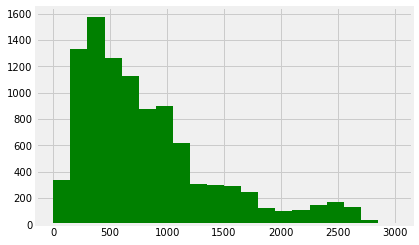

In [26]:
figure, axes = plt.subplots()
axes.hist(flights['DISTANCE'], range=(0, 3000), bins=20, color = 'green')

### Histograms

* Create two DataFrames by extracting flight details of 'AS' (Alaskan Airlines) and 'HA' (Hawaiin Airlines)



* Plot the histograms of the distance ('DISTANCE') travelled by each of 'AS' and 'HA' airlines
    * Adjust the parameters for each histogram
        * bins
        * range
        * color
        * alpha (opacity)
        * label
    * Provide a legend on the upper right corner to indicate which airline

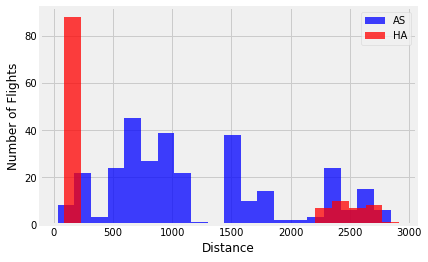

In [34]:
alaska = flights[flights["AIRLINE"] == 'AS']
hawaii = flights[flights["AIRLINE"] == 'HA']

figure, axes = plt.subplots()
axes.hist(
    alaska['DISTANCE'], 
    bins=20, 
    label='AS', # Use label to specify legend name
    color='blue', # Override the default color
    alpha=.75 # Adjust alpha to allow both datasets to appear
)
axes.hist(
    hawaii['DISTANCE'], 
    bins=20, 
    label='HA', # Use label to specify legend name
    color = 'red',
    alpha=.75 # Adjust alpha to allow both datasets to appear
)

# Enable the legend
axes.legend()

axes.set_xlabel("Distance")
axes.set_ylabel("Number of Flights")

### 2D Histograms

* Plot the 2D histograms of the distance ('DISTANCE') travelled and 'TAXI_IN' time. 
    * Adjust the parameters for each histogram
        * cmin
        * cmap
        * bins
        * range
    * Provide a colorbar for 'Number of flights'

In [37]:
# Dropping the missing values as plotting the histograms doesn't know how to handle missing data

flights.dropna(inplace=True)

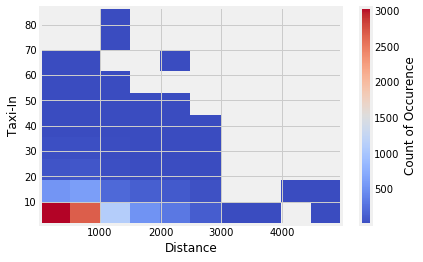

In [47]:
figure, axes = plt.subplots()
results = axes.hist2d(
    flights['DISTANCE'],
    flights['TAXI_IN'],
    cmap='coolwarm',
    cmin=1,
    bins = 10,) #doesn't put any data for nothing

figure.colorbar(results[3], label='Count of Occurence')
axes.set_xlabel("Distance")
axes.set_ylabel("Taxi-In")
#More Taxi-in time for shorter distance flights

# Making Interactive Plots

Instead of saying `%matplotlib inline` if you used **`%matplotlib notebook`** you can interact with your plots. This is makes visualization even more **fun**!

In [50]:
# Add this after your imports to configure Jupyter to 
# display your plots and INTERACT with them
%matplotlib notebook

import matplotlib as mpl
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


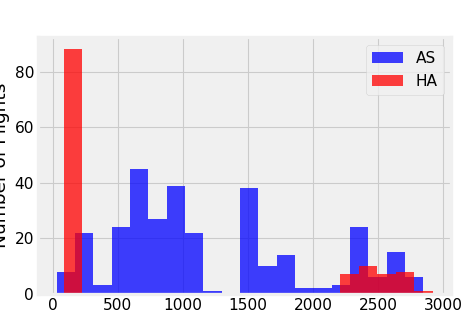

In [51]:
alaska = flights[flights["AIRLINE"] == 'AS']
hawaii = flights[flights["AIRLINE"] == 'HA']

figure, axes = plt.subplots()
axes.hist(
    alaska['DISTANCE'], 
    bins=20, 
    label='AS', # Use label to specify legend name
    color='blue', # Override the default color
    alpha=.75 # Adjust alpha to allow both datasets to appear
)
axes.hist(
    hawaii['DISTANCE'], 
    bins=20, 
    label='HA', # Use label to specify legend name
    color = 'red',
    alpha=.75 # Adjust alpha to allow both datasets to appear
)

# Enable the legend
axes.legend()

axes.set_xlabel("Distance")
axes.set_ylabel("Number of Flights")

# Matplotlib Subplots

## Introduction
In this section we are going to learn how to create multiple plots that are connected to each other in a single *`figure`* object. In Matplotlib, these are called "subplots". You may also think of them as linked plots.

In [52]:
nd_football_roster = pd.read_csv('./data/nd-football-2017-roster.csv')
seattle_weather_2015_2016 = pd.read_csv(
    './data/seattle_weather_2015_2016.csv')

## Generating Subplots
You've actually been using the method needed to create a grid of subplots from the very beginning of this chapter.

We've used **`plt.subplots()`** function to return a single figure and axes objects, but it is also capable of generating a grid of axes objects with supplied with the correct arguments.

In the following example, I will generate a 1x2 grid of axes for us to work with.

<IPython.core.display.Javascript object>


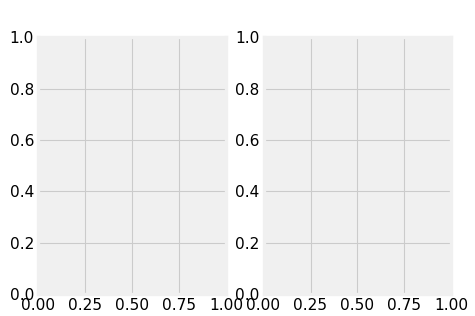

<class 'numpy.ndarray'>


In [53]:
figure, axes = plt.subplots(1, 2)
print(type(axes), axes, sep='\n')

Notice that the *`axes`* variable now points to a Numpy array filled with **`AxesSubplot`** objects. If we attempt to plot something on the *`axes`* variable itself it will fail because a Numpy array can't plot anything!

<IPython.core.display.Javascript object>


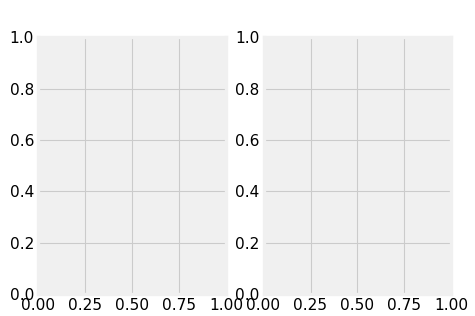

AttributeError: 'numpy.ndarray' object has no attribute 'scatter'

In [54]:
figure, axes = plt.subplots(1, 2)
axes.scatter(nd_football_roster['Height'])

Instead we have to address the specific **`AxesSubplot`** objects inside of the Numpy array that we want to plot with:

<IPython.core.display.Javascript object>


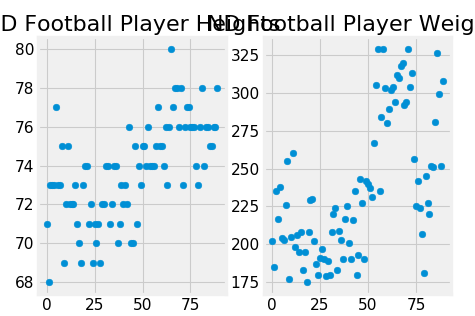

In [55]:
figure, axes = plt.subplots(1, 2)
axes[0].scatter(
    nd_football_roster.index, nd_football_roster['Height'])
axes[0].set_title('ND Football Player Heights')

axes[1].scatter(
    nd_football_roster.index, nd_football_roster['Weight'])
axes[1].set_title('ND Football Player Weights')

A potentially confusing case arises when you create a grid with multiple rows as this results in a 2 dimensional Numpy array being returned from the *`plt.subplots()`* method.

When you have this condition, you have to specify both the row and column indices of the *`AxesSubplot`* objects you want to plot with.

In the following example, I will only plot on the top-left and bottom-right subplots to demonstrate.

<IPython.core.display.Javascript object>


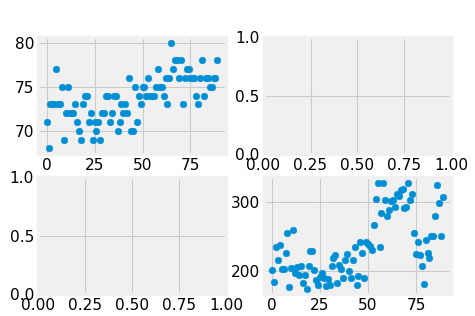

In [56]:
figure, axes = plt.subplots(2, 2)
axes[0, 0].scatter(
    nd_football_roster.index, nd_football_roster['Height'])

axes[1, 1].scatter(
    nd_football_roster.index, nd_football_roster['Weight'])

### Sharing X/Y Axis between Subplots
In our examples above, each subplot is given a separate x and y axis. This can become somewhat cluttered as you can see.

The *`plt.subplots()`* method gives use the ability to share x/y axis between multiple subplots via the `sharex` and `sharey` arguments.

Let's show how we might use this with some Seattle weather subplots.

<IPython.core.display.Javascript object>


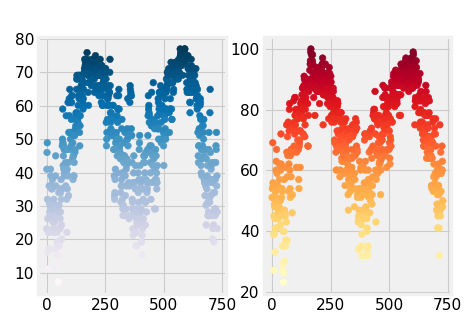

In [57]:
# Here we'll generate two plots
# The low/high temps for Seattle
figure, axes = plt.subplots(1, 2)

axes[0].scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['low_temp'], 
             c=seattle_weather_2015_2016['low_temp'], 
             cmap='PuBu')

axes[1].scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['high_temp'],
             c=seattle_weather_2015_2016['high_temp'], 
             cmap='YlOrRd')

Each of the subplots has been given its own x-axis and y-axis. Let's specify that they should share their y-axis and see how that changes the appearance of our figure:

<IPython.core.display.Javascript object>


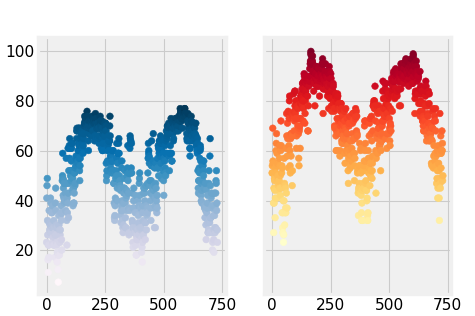

In [58]:
figure, axes = plt.subplots(1, 2, sharey=True)

axes[0].scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['low_temp'], 
             c=seattle_weather_2015_2016['low_temp'], 
             cmap='PuBu')

axes[1].scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['high_temp'],
             c=seattle_weather_2015_2016['high_temp'], 
             cmap='YlOrRd')

Very nice. You can see now that there is a single y-axis that is shared between the two subplots. Matplotlib automatically expands the values in the axis to the range necessary to cover the two subplots.

Doing this not only reduced the complexity of the two plots, but also visually aligned the data so that the low temperatures appear lower than the high temperatures.

# Activity

### Subplots

We will use seattle_weather_2015_2016.csv for this activity

* Use subplots to plot the following two plots in a single *figure* 
    * Plot a scatter plot of avgwindspeed with the color of the points indicating the speed of wind
    * Plot a histogram of histogram of the avgwindspeed.
    * Make sure you provide the following metadata for **each** of the plot
        * Set the title
        * Set the labels for x-axis and y-axis
    
* Does it make sense to share the y-axis (sharey) in this case? 

<IPython.core.display.Javascript object>


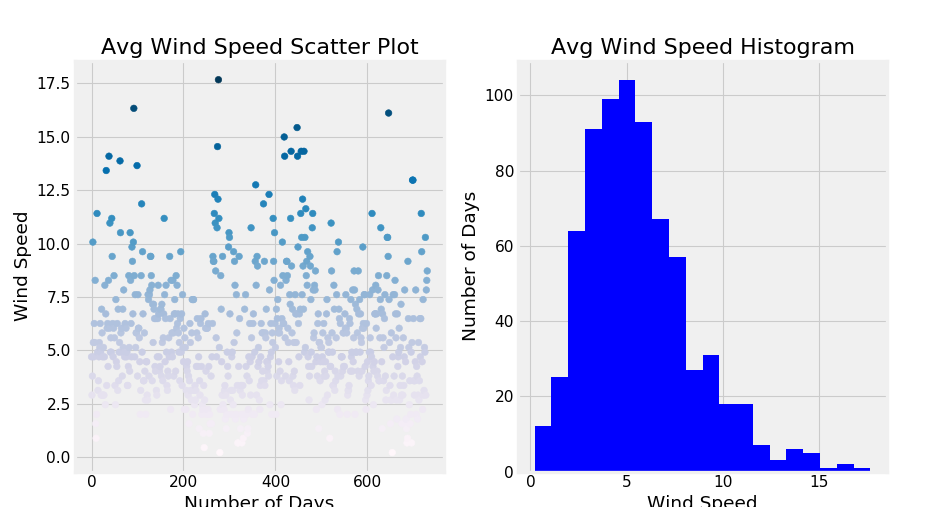

In [67]:
# Here we'll generate two plots
# The low/high temps for Seattle
figure, axes = plt.subplots(1, 2)

axes[0].scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['avgwindspeed'],
             c=seattle_weather_2015_2016['avgwindspeed'], 
             cmap='PuBu')

axes[1].hist(seattle_weather_2015_2016['avgwindspeed'], bins=20, color = 'blue')

axes[0].set_title('Avg Wind Speed Scatter Plot')
axes[0].set_xlabel("Number of Days")
axes[0].set_ylabel("Wind Speed")

axes[1].set_title('Avg Wind Speed Histogram')
axes[1].set_xlabel("Wind Speed")
axes[1].set_ylabel("Number of Days")


# Matplotlib Advanced Customizations

## Adjusting Plot Sizes
Often times, you will want to adjust the size of your plots. There are a couple of different ways that you can accomplish this.

<IPython.core.display.Javascript object>


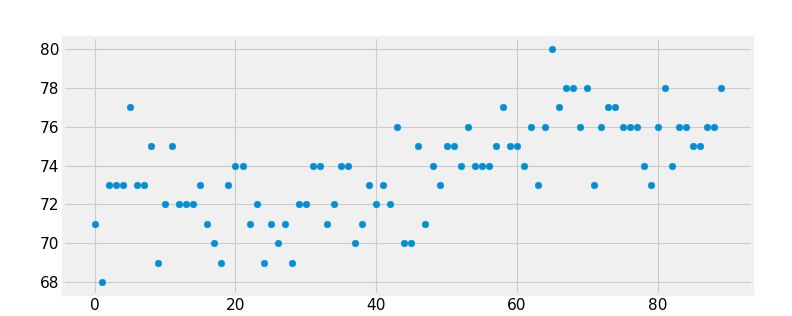

In [68]:
figure, axes = plt.subplots()
axes.scatter(nd_football_roster.index, nd_football_roster['Height'])

# You can use the `figure.set_size_inches()` method to 
# specify the desired width/height of your figure.
# If the requested size is too big for the Jupyter 
# display, Matplotlib will display a plot that still
# has the correct display ratio.
figure.set_size_inches(10, 4)

<IPython.core.display.Javascript object>


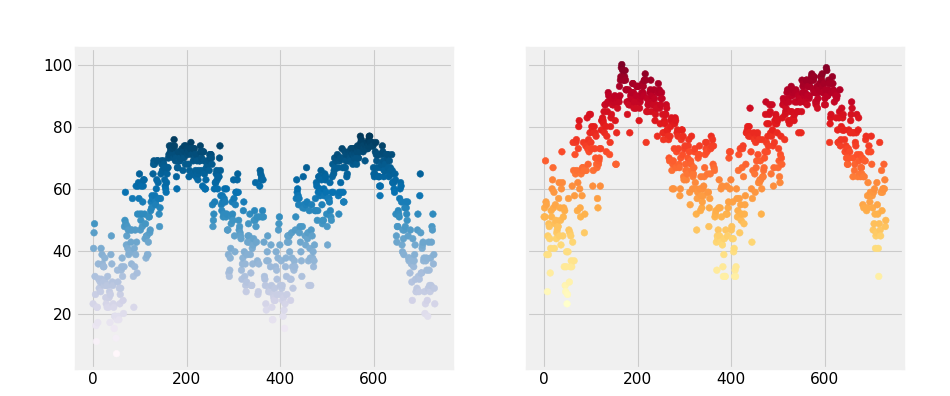

In [69]:
# You can also pass the `figsize` argument to `plt.subplots()`
# to accomplish the same effect.
figure, axes = plt.subplots(1, 2, sharey=True, figsize=(12,5))

axes[0].scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['low_temp'], 
             c=seattle_weather_2015_2016['low_temp'], 
             cmap='PuBu')

axes[1].scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['high_temp'],
             c=seattle_weather_2015_2016['high_temp'], 
             cmap='YlOrRd')


## Adding Text to Plots
Sometimes, you may want to add explanatory text to your plots.

In its most basic usage, you simply specify x and y values and the text that you want to display.

<IPython.core.display.Javascript object>


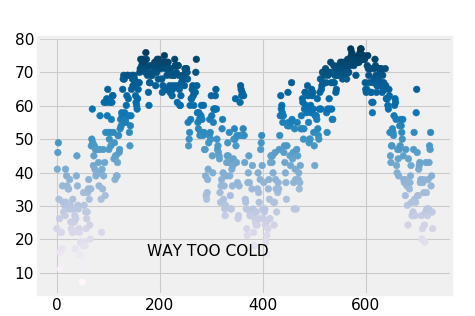

In [70]:
figure, axes = plt.subplots()

axes.scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['low_temp'], 
             c=seattle_weather_2015_2016['low_temp'], 
             cmap='PuBu')

axes.text(175, 15,'WAY TOO COLD')


You can also specify a number of parameters to customize the text's position and appearance:

<IPython.core.display.Javascript object>


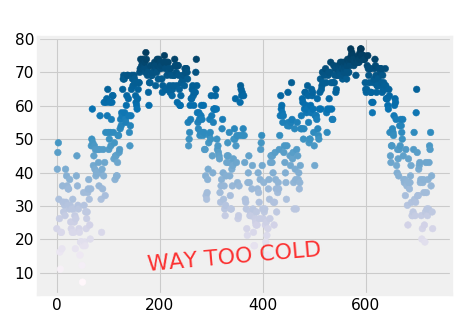

In [71]:
figure, axes = plt.subplots()

axes.scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['low_temp'], 
             c=seattle_weather_2015_2016['low_temp'], 
             cmap='PuBu')

axes.text(175, 15,'WAY TOO COLD', 
          size=20, # Adjust the size
          alpha=.8, # Adjust opacity
          color='red', # Change the color
          rotation=5 # Add a rotation
         )

There are a lot more customizations and advanced plotting possible using matplotlib

1. Adding Annotations (Text with Lines)
2. Customizing Tick Marks
    * Modifying the Number & Position of Tick Marks
3. Visualizing Error Bars
4. Fancy texts on your plots, including mathematical notations
5. Three dimensional plotting
6. Geographic Plotting

# Plotting with Seaborn 

Seaborn provides more sophistication on top of Matplotlib that makes them produce plots that more statistical and integrates with the functionality provided by Pandas DataFrame 

In [72]:
import seaborn as sns

Remember, plotting of histogram using Matplotlib from above. 

<IPython.core.display.Javascript object>


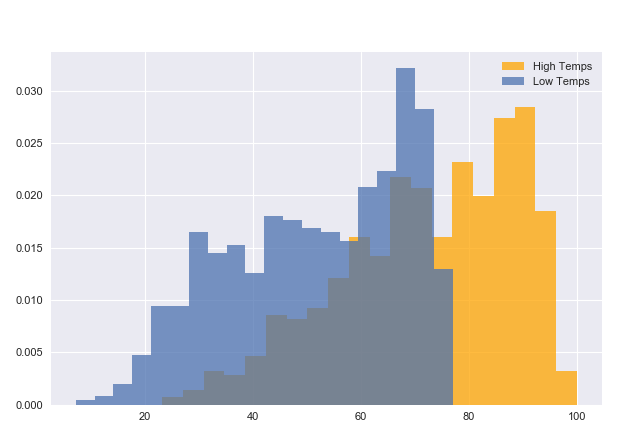

In [73]:
figure, axes = plt.subplots()
axes.hist(
    seattle_weather_2015_2016['high_temp'], 
    bins=20, 
    label='High Temps', # Use label to specify legend name
    color='orange', # Override the default color
    alpha=.75, # Adjust alpha to allow both datasets to appear
    normed=True # Set y-axis as probability. 
)
axes.hist(
    seattle_weather_2015_2016['low_temp'], 
    bins=20, 
    label='Low Temps', # Use label to specify legend name
    alpha=.75, # Adjust alpha to allow both datasets to appear
    normed=True # Set y-axis as probability. 
)

# Enable the legend
axes.legend()

Note, that above when you set `normed=True`, the y-axis doesn't represent the frequency but the probability of falling in that bucket.

With **seaborn** we can plot these histogram and also a curve that shows the distribution. 

In [74]:
seattle_weather_2015_2016['low_temp']

0      23.2
1      41.0
2      46.0
3      48.9
4      32.0
5      26.2
6      16.2
7      11.1
8      22.1
9      22.1
10     17.2
11     36.0
12     31.1
13     28.2
14     31.1
15     30.2
16     27.1
17     41.0
18     31.1
19     39.0
20     36.0
21     30.2
22     35.1
23     35.1
24     29.1
25     37.9
26     30.2
27     25.2
28     23.2
29     29.1
       ... 
701    33.1
702    33.1
703    41.0
704    42.1
705    43.0
706    37.0
707    37.9
708    27.1
709    20.1
710    23.2
711    37.0
712    37.9
713    34.0
714    24.3
715    19.2
716    28.2
717    43.0
718    34.0
719    29.1
720    27.1
721    37.9
722    29.1
723    43.0
724    48.0
725    46.9
726    52.0
727    36.0
728    39.0
729    28.2
730    23.2
Name: low_temp, Length: 731, dtype: float64

<IPython.core.display.Javascript object>


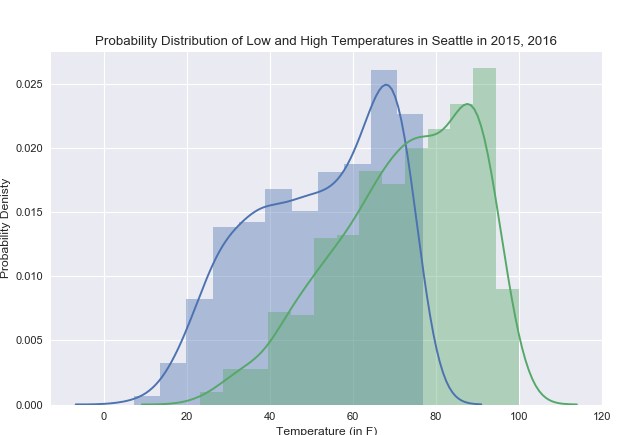

In [75]:
figure, axes = plt.subplots()

sns.distplot(seattle_weather_2015_2016['low_temp'], ax= axes)
sns.distplot(seattle_weather_2015_2016['high_temp'], ax = axes)

axes.set_title("Probability Distribution of Low and High Temperatures in Seattle in 2015, 2016")
axes.set_xlabel("Temperature (in F)")
axes.set_ylabel("Probability Denisty")

### Pair plots

These are very useful when you start working with any data. You might want to understand how each variable is related to one another. 

Seaborn is smart to figure out DataFrames which are numbers and only compare across them. 

In [76]:
seattle_weather_2015_2016.head()

,date,low_temp,high_temp,precipitation,snowfall,snowdepth,avgwindspeed,fog,mist,rain,ice,snow,freezingrain,thunder,highwind,hail
0,1/1/15,23.2,51.1,0.00,0.0,0.0,4.70,No,No,No,No,No,No,No,No,No
1,1/2/15,41.0,54.0,0.00,0.0,0.0,2.91,No,No,No,No,No,No,No,No,No
2,1/3/15,46.0,51.1,0.16,0.0,0.0,3.80,Yes,No,No,No,No,No,No,No,No
3,1/4/15,48.9,69.1,0.29,0.0,0.0,10.07,Yes,No,No,No,No,No,No,No,No
4,1/5/15,32.0,55.9,0.00,0.0,0.0,5.37,No,No,No,No,No,No,No,No,No


<IPython.core.display.Javascript object>


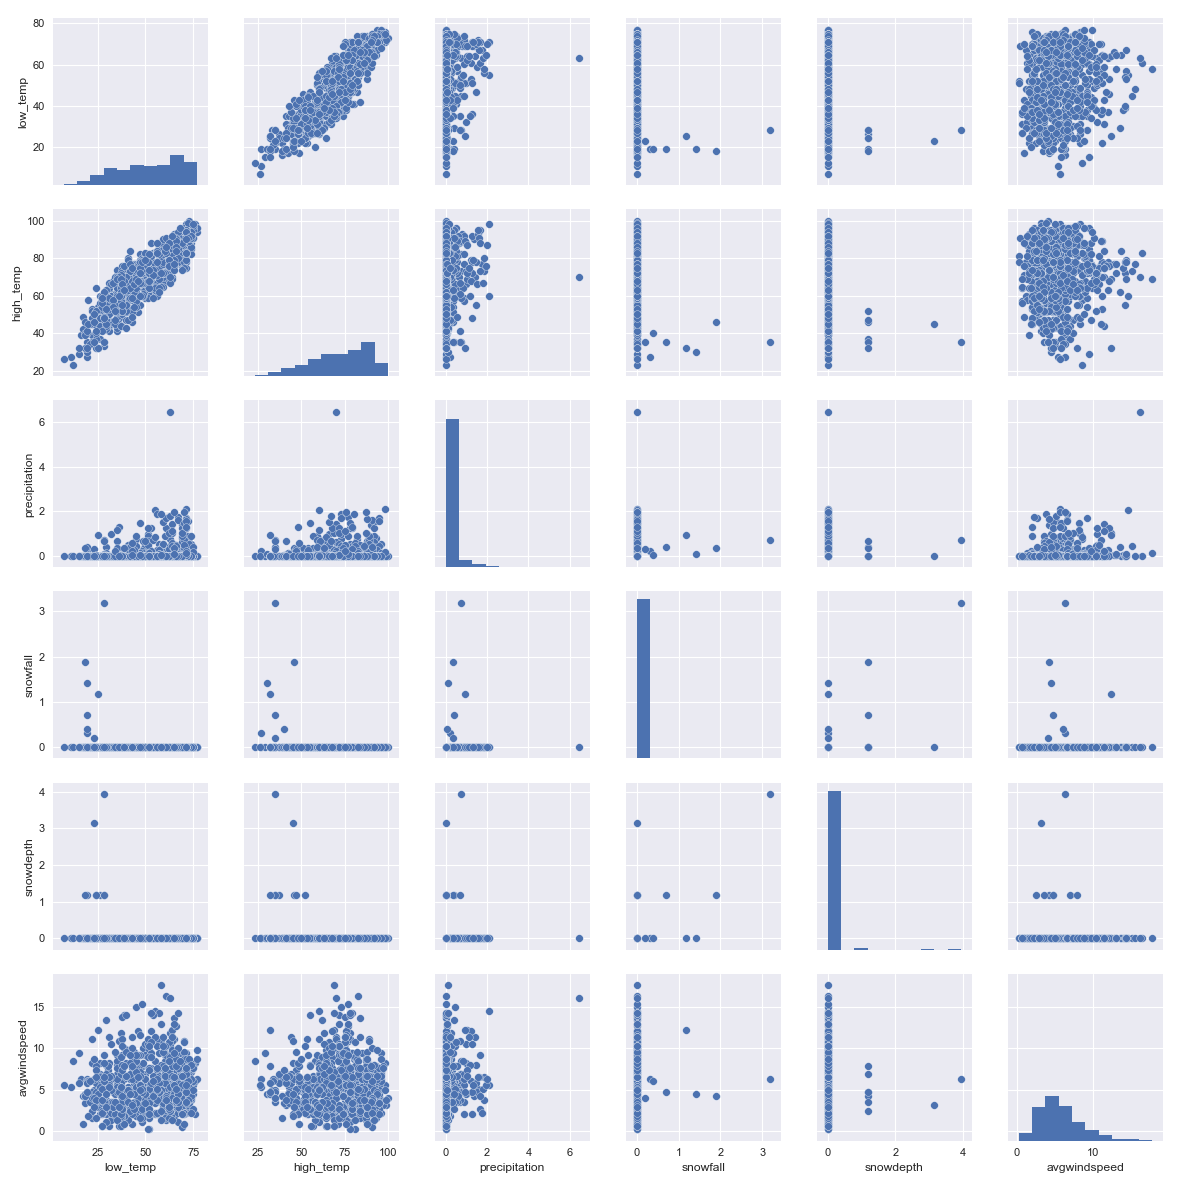

In [77]:
sns.pairplot(seattle_weather_2015_2016)

### Joint plot

<IPython.core.display.Javascript object>


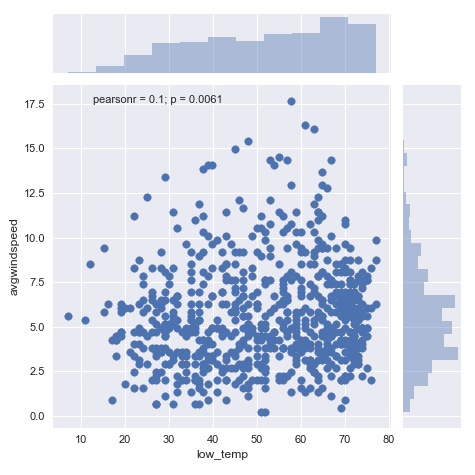

In [78]:
sns.jointplot("low_temp", "avgwindspeed", data=seattle_weather_2015_2016)

## Activty

Use seaborn to produce these plots. 

1. Select the flight details of American Airlines ('AA') and United Airlines ('UA')
2. Plot the histogram with probability density plot for the distance of the flights by these two airlines


In [79]:
flights = pd.read_csv("./data/flight_sample.csv")
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAXI_IN,TAXI_OUT,DISTANCE
0,2015,8,19,3,EV,3260,7.0,20.0,1091
1,2015,9,23,3,WN,3050,4.0,9.0,837
2,2015,10,16,5,AA,1382,13.0,25.0,761
3,2015,1,19,1,WN,4274,5.0,23.0,1547
4,2015,4,22,3,WN,2237,5.0,18.0,872


In [81]:
ua_flights = flights[flights['AIRLINE']=='UA']
aa_flights = flights[flights['AIRLINE']=='AA']

<IPython.core.display.Javascript object>


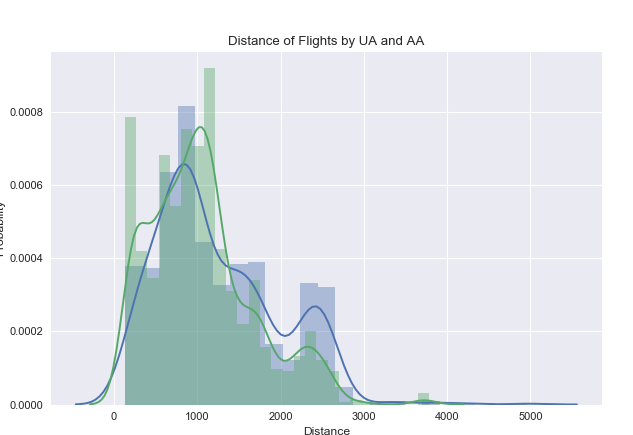

In [88]:
figure, axes = plt.subplots()

sns.distplot(ua_flights['DISTANCE'], ax= axes)
sns.distplot(aa_flights['DISTANCE'], ax = axes)

axes.set_title("Distance of Flights by UA and AA")
axes.set_xlabel("Distance")
axes.set_ylabel("Probability")

## Activity

* Pairplot on flights DataFrame

In [86]:
# pairplots are not good working with missing data, so we dropping it. 
# EASY TO DO BUT NOT ALWAYS A RIGHT THING TO DO 

flights.dropna(inplace=True)

<IPython.core.display.Javascript object>


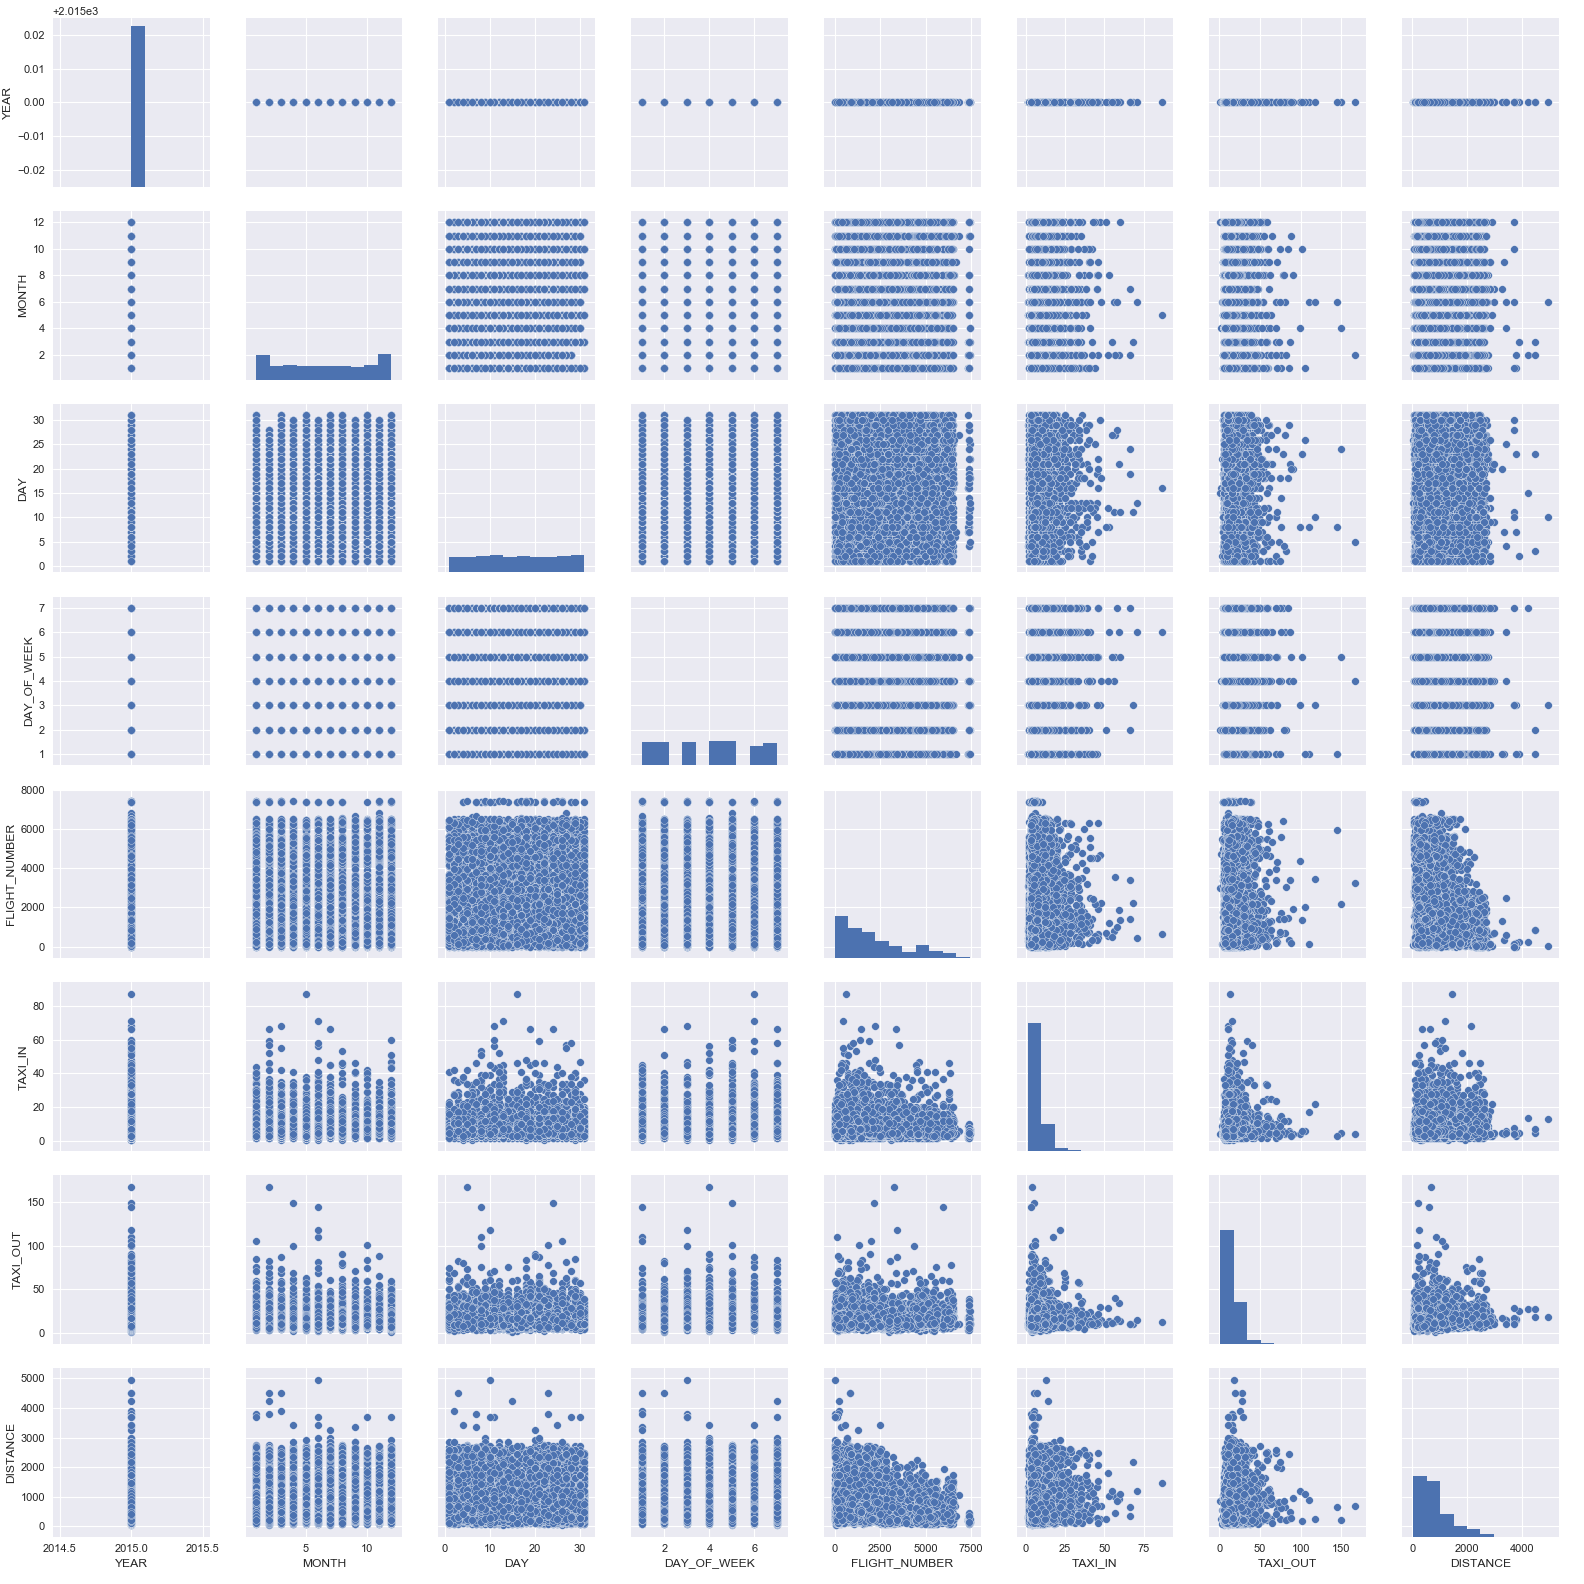

In [87]:
sns.pairplot(flights)